# K-Means Clustering

### Problem Definition
Perform K-Means Clustering on a dataset containing shopping details of customers from various cities to understand how clustering segregates the data similar to each other.
### Dataset Description
The dataset is based on the the shopping details of customers of few cities. The data has been populated randomly and holds no such relation to any real systems data or confidential data. It has 8 dimensions or features with 200 entries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv('Shopping_CustomerData.csv')
print(df1.shape)
df1.head()

(200, 8)


,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [3]:
#Here, we will take only two features
df = df1[["CustomerAge","SpendingScore"]]
df.head()

,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [4]:
#Checking for Null Values
df.isnull().sum()

CustomerAge      0
SpendingScore    0
dtype: int64

In [5]:
df.describe()

,CustomerAge,SpendingScore
count,200.000000,200.00000
mean,45.520000,50.70500
std,16.113592,28.72269
min,18.000000,2.00000
25%,31.750000,27.75000
50%,46.500000,48.00000
75%,59.000000,77.00000
max,75.000000,100.00000


**Plot the unclustered data**

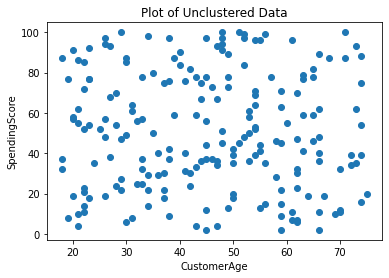

In [6]:
plt.scatter(df.iloc[:,0],df.iloc[:,1])
plt.xlabel('CustomerAge')
plt.ylabel('SpendingScore')
plt.title('Plot of Unclustered Data')
plt.show()



**K-means Clustering Algorithm** is a simple and easy to implement **unsupervised** machine learning algorithm.
The main objective of K-means clustering is to group similar data points together into a cluster.It is used when we have unlabelled data.
The aim of this algorithm is to divide 'n' number of observations into 'k' number of clusters.  

A **cluster** refers to a collection of data points clubbed together because of existing similarities between them. The task of identifying and assigning similar data-points to a cluster is known as **Clustering**.


### K-Means using scikit learn

In [7]:
#Here, we are assuming the value of k as 3
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)

KMeans(n_clusters=3)

In [ ]:
df.head()

,CustomerAge,SpendingScore
0,49,78
1,59,63
2,54,69
3,42,30
4,30,6


In [8]:
#Here, we are generating Labels of each point
labels = kmeans.predict(df)
labels

array([0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 2, 0, 0, 0, 2,
       0, 2, 0, 0, 2, 2, 1, 2, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1,
       0, 2, 2, 0, 2, 1, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 2, 0,
       1, 0, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 0, 2,
       2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1,
       0, 1, 1, 2, 2, 0, 0, 2, 1, 2, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 2, 2,
       1, 1], dtype=int32)

In [9]:
#printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[44.82089552, 84.65671642],
       [44.37288136, 16.72881356],
       [47.06756757, 47.05405405]])

In [ ]:
# WCSS - within cluster sum of square distances
# Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are
kmeans.inertia_

38960.99817612663

### Visualizing the Clustered Data

In [10]:
df['label'] = labels
df.head()

,CustomerAge,SpendingScore,label
0,49,78,0
1,59,63,2
2,54,69,0
3,42,30,1
4,30,6,1


In [11]:
colmap = {0:'r',1:'g',2:'b',3:'y',4:'c'}
df['color'] = df['label'].apply(lambda x: colmap[x])
df.head()

,CustomerAge,SpendingScore,label,color
0,49,78,0,r
1,59,63,2,b
2,54,69,0,r
3,42,30,1,g
4,30,6,1,g


In [ ]:
for idx, centroid in enumerate(centroids):
    print(idx, centroid)

0 [44.82089552 84.65671642]
1 [44.37288136 16.72881356]
2 [47.06756757 47.05405405]


In [ ]:
for idx, centroid in enumerate(centroids):
    print(centroid[0], centroid[1])

44.82089552238806 84.65671641791047
44.3728813559322 16.728813559322063
47.067567567567565 47.054054054054056


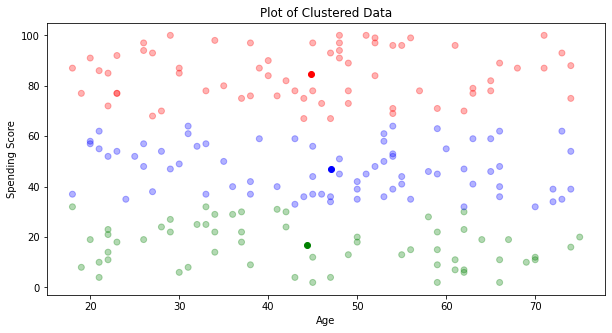

In [12]:
plt.figure(figsize=(10, 5))
plt.scatter(df['CustomerAge'], df['SpendingScore'], color=df['color'], alpha=0.3)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx])
    # plt.scatter(centroid[0], centroid[1], color=colmap[idx])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Plot of Clustered Data')
plt.show()

### How to determine the value of K?

* If we know how many classes we want to classify, then we use that value as 'k'. For Example - All of us have heard of the Iris data or even worked with it earlier. It has three classes we could classify our flowers into. So, in that case the value of k could be taken as 3.
* If we don't know how many classes we want, then we will have to decide what the best 'k' value is. A very popular to find the value of 'k' is **Elbow Method**
* **Inertia** is the WCSS (within cluster sum of squares (sum of squared distance from mean) for each cluster. Therefore the smaller the inertia the denser the cluster(closer together all the points are)

#### Elbow Method

In [13]:
df = df1[["CustomerAge","SpendingScore"]]
inertia_list = []
for k in np.arange(3, 16, 2):
    kmeans =KMeans(n_clusters=k)
    kmeans.fit(df)
    inertia_list.append(kmeans.inertia_)

inertia_list

[69228.85879694519,
 38741.97371675943,
 25034.33110465866,
 19121.761633678212,
 15173.46475145082,
 12975.063755310739,
 10740.985790598292]

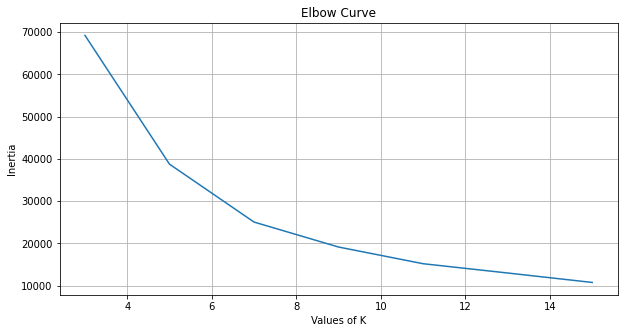

In [14]:
#Plotting the Elbow Curve
plt.figure(figsize=(10, 5))
plt.plot(np.arange(3,16,2), inertia_list)
plt.grid(True)
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.show()

**From above, we select the optimum value of k by determining the Elbow Point - a point after which the inertia starts decreasing linearly. In this case, we can select the value of k as 7.**

In [20]:
df = df1[["CustomerAge","SpendingScore"]]
kmeans = KMeans(n_clusters=5)
kmeans.fit(df)
labels = kmeans.predict(df)
df['label'] = labels
colmap = {0:'r',1:'g',2:'b',3:'y',4:'c'}
df['color'] = df['label'].apply(lambda x: colmap[x])
centroids = kmeans.cluster_centers_

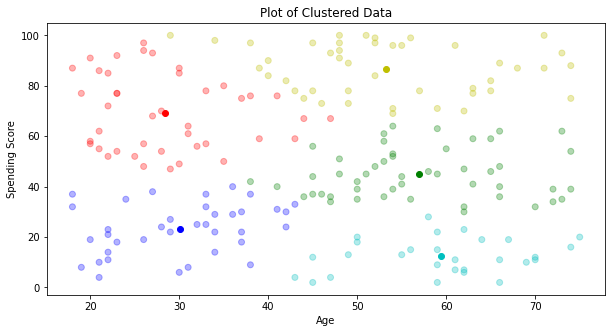

In [21]:
plt.figure(figsize=(10, 5))
plt.scatter(df['CustomerAge'], df['SpendingScore'], color=df['color'], alpha=0.3)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx])
    # plt.scatter(centroid[0], centroid[1], color=colmap[idx])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Plot of Clustered Data')
plt.show()

In [22]:
df.head()

,CustomerAge,SpendingScore,label,color
0,49,78,3,y
1,59,63,1,g
2,54,69,3,y
3,42,30,2,b
4,30,6,2,b


In [23]:
dfc0 = df[df.label == 0]
dfc0

,CustomerAge,SpendingScore,label,color
7,23,77,0,r
17,30,49,0,r
18,37,75,0,r
23,31,64,0,r
27,33,57,0,r
37,23,77,0,r
44,26,97,0,r
49,26,48,0,r
60,25,52,0,r
62,39,59,0,r


In [24]:
dfc1 = df[df.label == 1]
dfc1

,CustomerAge,SpendingScore,label,color
1,59,63,1,g
11,73,62,1,g
12,54,64,1,g
14,54,53,1,g
15,53,36,1,g
26,65,59,1,g
34,66,48,1,g
35,62,30,1,g
42,54,39,1,g
45,72,34,1,g
